In [64]:
import os
os.environ['PROJ_LIB'] = r'/home/tanmay/anaconda3/pkgs/proj4-5.2.0-he6710b0_1/share/proj'
import warnings
warnings.simplefilter('ignore')

<h1 style="text-align:center;">LOCATION TRAIL</h1><br>
<small style="float:right;margin-right:3vw;">Tanmay - 44</small>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime as dt
#To Show Plots In Jupyter Notebook Itself
%matplotlib inline 

<strong>Loading Data Set For Location History</strong>

In [66]:
raw = pd.read_json('Location History.json')
print('There Are {:,} Rows In The Data Set'.format(len(raw)))

There Are 74,393 Rows In The Data Set


<strong>Parsing Latitude , Longitude And Timestamp From Dict Inside Locations Column</strong>

In [67]:
raw['lat'] = raw['locations'].map(lambda x:x['latitudeE7'])
raw['lon'] = raw['locations'].map(lambda x:x['longitudeE7'])
raw['timestamp_ms'] = raw['locations'].map(lambda x:x['timestampMs'])

#Converting Lat/Lon To degrees And Timestamp To date-time
raw['lat'] = raw['lat']/10.**7
raw['lon'] = raw['lon']/10.**7
raw['timestamp_ms'] = raw['timestamp_ms'].astype(float)/1000
raw['datetime'] = raw['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(raw['datetime'].min()[:4],raw['datetime'].max()[:4])

<strong>Dropping Columns That Are Not Needed</strong>

In [68]:
raw = raw.drop(labels=['locations','timestamp_ms'],axis=1,inplace=False)

#Showing Small Part Of DATA FRAME
raw[1000:1100]

,lat,lon,datetime
1000,28.593779,77.088100,2016-08-27 15:19:20
1001,28.593903,77.090237,2016-08-27 15:19:46
1002,28.593919,77.090184,2016-08-27 15:20:22
1003,28.593921,77.090185,2016-08-27 15:21:24
1004,28.593903,77.090236,2016-08-27 15:22:25
...,...,...,...
1095,28.593903,77.090237,2016-08-27 19:01:53
1096,28.593903,77.090237,2016-08-27 19:03:52
1097,28.593902,77.090238,2016-08-27 19:05:17
1098,28.593857,77.090257,2016-08-27 21:59:58


<strong>Mapping Entire Data Set</strong>

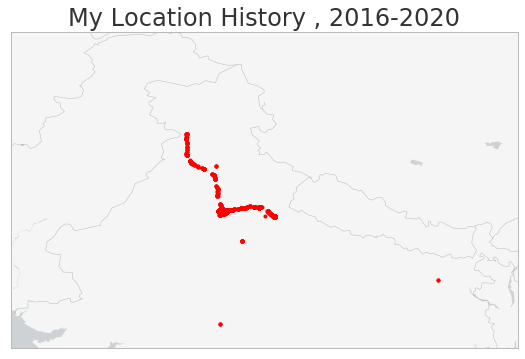

In [69]:
#Map Colours
land_color  = '#f5f5f5'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

#Creating Plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121,facecolor='#ffffff',frame_on=False)
ax.set_title('My Location History , {}'.format(date_range),fontsize=24,color='#333333')

#Draw BaseMap And Its Features
m = Basemap(projection='gall',lon_0=0,lat_0=0,llcrnrlon = 68,llcrnrlat=22,urcrnrlon=90,urcrnrlat=37,resolution='l')
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)

# project the location history points then scatter plot them
x, y = m(raw['lon'].values, raw['lat'].values)
m.plot(x,y,'ro',markersize=3)

# show the map
plt.show()

<h2>Zoomed Version Of Above Map</h2>

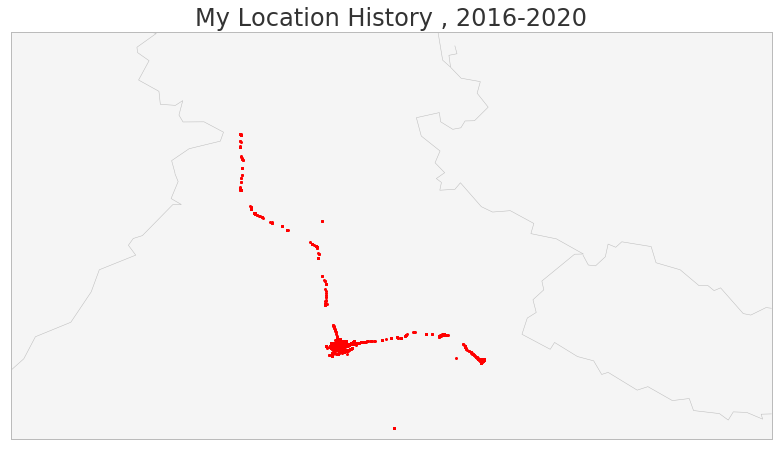

In [70]:
#Map Colours
land_color  = '#f5f5f5'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

#Creating Plot
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(121,facecolor='#ffffff',frame_on=False)
ax.set_title('My Location History , {}'.format(date_range),fontsize=24,color='#333333')

#Draw BaseMap And Its Features
m = Basemap(projection = 'gall',lon_0=0,lat_0=0,llcrnrlon = 72,llcrnrlat=27,urcrnrlon=84,urcrnrlat=34,resolution='l')
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)

# project the location history points then scatter plot them
x, y = m(raw['lon'].values, raw['lat'].values)
m.plot(x,y,'ro',markersize=2)

# show the map
plt.show()